<a href="https://colab.research.google.com/github/dieund/CS2225.CH1501/blob/master/Tuoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Remove old version
!rm -rf opencv-age-detection.zip facedetect.zip opencv-age-detection
#Download opencv-age-detection
!gdown --id 1QHndjwEAdH2UBiLyWLislf_bzP4uFTOu
!unzip opencv-age-detection.zip

Downloading...
From: https://drive.google.com/uc?id=1QHndjwEAdH2UBiLyWLislf_bzP4uFTOu
To: /content/opencv-age-detection.zip
53.3MB [00:00, 65.4MB/s]
Archive:  opencv-age-detection.zip
  inflating: opencv-age-detection/age_detector/age_deploy.prototxt  
  inflating: opencv-age-detection/images/adrian.png  
  inflating: opencv-age-detection/.DS_Store  
  inflating: opencv-age-detection/images/neil_patrick_harris.png  
  inflating: opencv-age-detection/detect_age.py  
  inflating: opencv-age-detection/detect_age_video.py  
  inflating: opencv-age-detection/face_detector/deploy.prototxt  
  inflating: opencv-age-detection/images/samuel_l_jackson.png  
  inflating: opencv-age-detection/face_detector/res10_300x300_ssd_iter_140000.caffemodel  
  inflating: opencv-age-detection/age_detector/age_net.caffemodel  


In [ ]:
from google.colab.patches import cv2_imshow
# import the necessary packages
import numpy as np
import argparse
import cv2
import os
facePath = "opencv-age-detection/face_detector/"
agePath = "opencv-age-detection/age_detector/"
confidenceParam = 0.5

In [ ]:
# define the list of age buckets our age detector will predict
AGE_BUCKETS = ["(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)",
	"(38-43)", "(48-53)", "(60-100)"]

In [ ]:
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = os.path.sep.join([facePath, "deploy.prototxt"])
weightsPath = os.path.sep.join([facePath,
	"res10_300x300_ssd_iter_140000.caffemodel"])
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)
# load our serialized age detector model from disk
print("[INFO] loading age detector model...")
prototxtPath = os.path.sep.join([agePath, "age_deploy.prototxt"])
weightsPath = os.path.sep.join([agePath, "age_net.caffemodel"])
ageNet = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] loading face detector model...
[INFO] loading age detector model...


In [ ]:
# load the input image and construct an input blob for the image
image = cv2.imread("opencv-age-detection/images/adrian.png")
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
faceNet.setInput(blob)
detections = faceNet.forward()

[INFO] computing face detections...


[INFO] (25-32): 57.51%


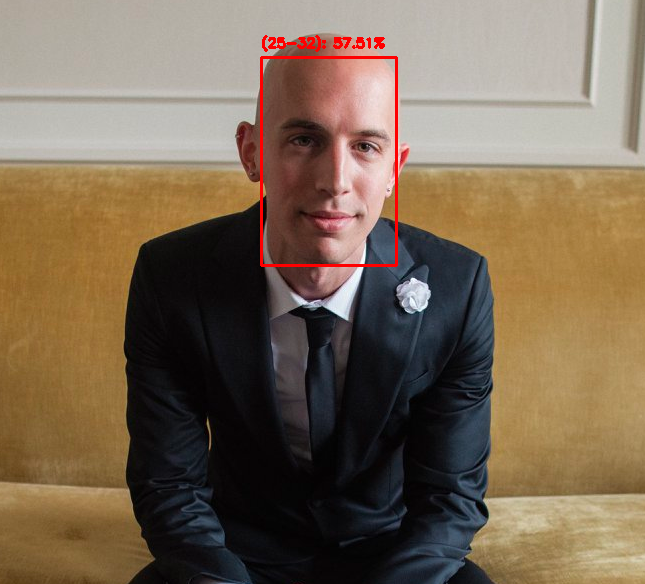

In [ ]:
# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > confidenceParam:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# extract the ROI of the face and then construct a blob from
		# *only* the face ROI
		face = image[startY:endY, startX:endX]
		faceBlob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),
			(78.4263377603, 87.7689143744, 114.895847746),
			swapRB=False)
  		# make predictions on the age and find the age bucket with
		# the largest corresponding probability
		ageNet.setInput(faceBlob)
		preds = ageNet.forward()
		i = preds[0].argmax()
		age = AGE_BUCKETS[i]
		ageConfidence = preds[0][i]
		# display the predicted age to our terminal
		text = "{}: {:.2f}%".format(age, ageConfidence * 100)
		print("[INFO] {}".format(text))
		# draw the bounding box of the face along with the associated
		# predicted age
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
# display the output image
cv2_imshow( image)
